In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy.random import seed

In [4]:
data = pd.read_csv("default_of_credit_card_clients.csv") #this is the cleaned dataset

In [5]:
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'defaulted'],
      dtype='object')

<h4>Cleaned dataset description</h4>

|variable   | description  | 
|---|---|
|limit_bal | Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit|
| sex | Gender (1 = male; 2 = female)|
| education | Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)|
| marriage | Marital status (1 = married; 2 = single; 3 = others)|
|age| Age (year)|
|pay_0 - pay_6 | History of past monthly payment records (from April to September, 2005): pay_0 = the repayment status in September, 2005; pay_1 = the repayment status in August, 2005; . . .;pay_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay on time; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.|
|bill_amt1 - bill_amt6 | Amount of bill statement (New Taiwan dollar). bill_amt1 = amount of bill statement in September, 2005; bill_amt2 = amount of bill statement in August, 2005; . . .; bill_amt6 = amount of bill statement in April, 2005. |
|pay_amt1 - pay_amt6 | Amount of previous payment (New Taiwan dollar). pay_amt1 = amount paid in September, 2005; pay_amt2 = amount paid in August, 2005; . . .;pay_amt6 = amount paid in April, 2005. |
| defaulted | whether or not client defaulted: 1 = yes; 0 = no |

In [9]:
data.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


To perform statistical inference on our dataset, we can consider applying frequentism and bootstrapping as suitable methods for this dataset. We can select a few variables of interest that may indicate differences among defaulters and non-defaulters. Take a look at the categorical variables:

In [8]:
data[['sex','education','marriage']] = data[['sex','education','marriage']].astype('category')

In [10]:
non_defaulted = data[data.defaulted == 0]
defaulted = data[data.defaulted == 1]

Compare education:

In [11]:
non_defaulted.education.value_counts(normalize=True).sort_index()

1    0.368134
2    0.458762
3    0.154621
4    0.018483
Name: education, dtype: float64

In [12]:
defaulted.education.value_counts(normalize=True).sort_index()

1    0.308943
2    0.501150
3    0.184844
4    0.005062
Name: education, dtype: float64

Compare gender:

In [13]:
non_defaulted.sex.value_counts(normalize=True).sort_index()

1    0.385702
2    0.614298
Name: sex, dtype: float64

In [14]:
defaulted.sex.value_counts(normalize=True).sort_index()

1    0.431815
2    0.568185
Name: sex, dtype: float64

Compare marriage:

In [15]:
non_defaulted.marriage.value_counts(normalize=True).sort_index()

1    0.45279
2    0.54721
Name: marriage, dtype: float64

In [16]:
defaulted.marriage.value_counts(normalize=True).sort_index()

1    0.489952
2    0.510048
Name: marriage, dtype: float64

The categorical variables do not appear to be a strong indicator of default behavior so we can instead consider the numerical variables such as limit balance `limit_bal` and payment history `pay_0 - pay_6`. An assumption is that clients who show a trend of delinquint payments are likely to default.

Let's look at limit balance first.

In [17]:
data.limit_bal.describe()

count     29459.000000
mean     167079.319733
std      128780.333592
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: limit_bal, dtype: float64

In [18]:
defaulted.limit_bal.describe()

count      6519.000000
mean     129981.236386
std      114780.414640
min       10000.000000
25%       50000.000000
50%       90000.000000
75%      200000.000000
max      740000.000000
Name: limit_bal, dtype: float64

In [19]:
non_defaulted.limit_bal.describe()

count     22940.000000
mean     177621.708806
std      130582.223294
min       10000.000000
25%       70000.000000
50%      150000.000000
75%      250000.000000
max      800000.000000
Name: limit_bal, dtype: float64

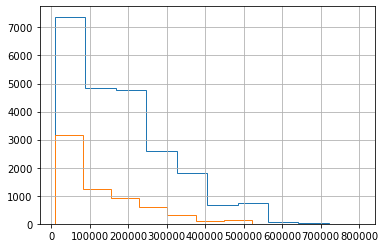

In [20]:
non_defaulted.limit_bal.hist(histtype='step')
defaulted.limit_bal.hist(histtype='step')

From the histogram and summary statistics, we see there is a starker contrast in starting limit balances among defaulters than non-defaulters. Both the mean and 75% quartile is significantly higher for non-defaulters compared to defaulters (mean ~ 130K vs 178K, 75% ~ 200K vs 250K respectively). Both groups appear to follow a left skewed distrubtion, however non-default groups have a much higher frequency of clients between 100K to ~230K. We can take a look at repayment status `pay_x`.

In [21]:
pay_cols = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']

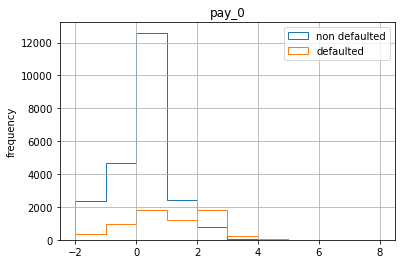

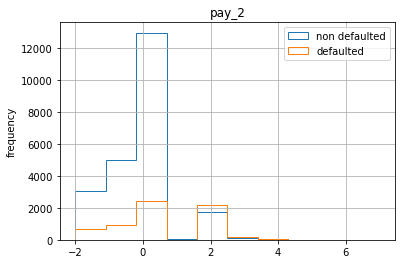

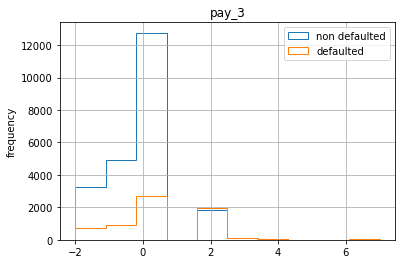

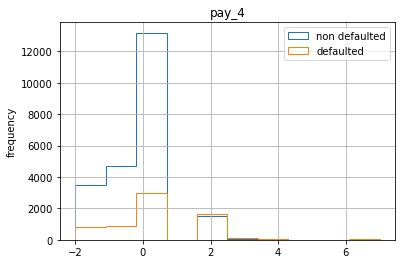

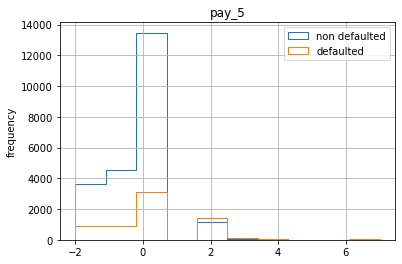

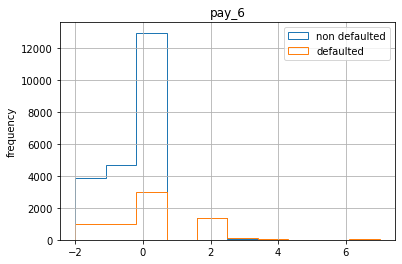

In [23]:
#plot the frequencies
for i in range(len(pay_cols)):
    _ = non_defaulted[str(pay_cols[i])].hist(histtype='step',label='non defaulted')
    _ = defaulted[str(pay_cols[i])].hist(histtype='step',label='defaulted')
    plt.ylabel('frequency')
    plt.legend()
    plt.title(pay_cols[i])
    plt.show()

We see in the histograms that for repayment status, the default group shows a stronger contrast in repayment delay in the `pay_0` and `pay_6` recorded features. That is, the  repayment status in September, 2005, which is the first recorded payment status, and repayment status in April, 2005, which is the last recorded payment status show defaulters being behind payments by 2 months much more frequent. As a result we can consider using `limit_bal`,`pay_0` and `pay_6` for statisical inference. 

For limit balance, we can consider a hypothesis test where we believe defaulters will have a significantly lower limit balance than non-defaults. That is, we observe the mean of the limit balance is significantly lower for non-defaulters than non-defaulters. (S/N: Does giving a higher limit balance make a huge difference whether a customer will default?). We can construct a one-tailed frequentist test to determine if there is a difference between charges in the left direction (< 177621, the non-default group mean balance).

#### Frequentist Test

In [24]:
#we can consider performing more samples and then taking the averages of these samples to have more representative statistics
seed(123)
s_means = []

# calculate 1000 means sampled from the larger dataset
for n in range(1000):
    sample = np.random.choice(defaulted.limit_bal, 50)
    s_means.append(np.mean(sample))

s_std = np.std(s_means, ddof=1)
s_means = np.mean(s_means)

In [25]:
#95% Confidence Interval
z = 1.96
n = len(defaulted.limit_bal)
ci = (z * s_std) / np.sqrt(n)
print("95% CI:",(s_means - ci),(s_means + ci))
print("Samples Mean:",s_means)
print("Samples STD:",s_std)

95% CI: 129573.57146134548 130341.25733865454
Samples Mean: 129957.41440000001
Samples STD: 15812.042562822842


We can also construct a t-test to confirm if limit balance in default and non-default groups is significantly different. The null hypothesis is there is no difference in limit balances among people who defaulted compared to people who have not. The alternative hypothesis is that people who defaulted have a lower limit balance than those who have not. We are assumming the variance amongst the two groups are relatively the same (i.e. the overall standard deviation of the sampled means).

In [26]:
from scipy import stats
t_stat, p_val = stats.ttest_ind(defaulted.limit_bal, non_defaulted.limit_bal)
print("t stat:", t_stat, "p value:", p_val)

t stat: -26.67348483578993 p value: 6.635748329784493e-155


We fail to reject the null hypothesis that there is no difference in limit balances as the t-test indicates a significant difference in limit balance among both groups.

We can try these tests for the `pay_0` and `pay_6` variables:

In [27]:
seed(123)
pay_0_means = []
pay_6_means = []

# calculate 1000 means sampled from the larger dataset
for n in range(1000):
    sample = np.random.choice(defaulted.pay_0, 50)
    pay_0_means.append(np.mean(sample))

for n in range(1000):
    sample = np.random.choice(defaulted.pay_6, 50)
    pay_6_means.append(np.mean(sample))

pay_0_s_std = np.std(pay_0_means, ddof=1)
pay_0_s_mean = np.mean(pay_0_means)

pay_6_s_std = np.std(pay_6_means, ddof=1)
pay_6_s_mean = np.mean(pay_6_means)

In [28]:
z = 1.96
n = len(defaulted.pay_0)

#pay_0 samples
ci = (z * pay_0_s_std) / np.sqrt(n)
print("pay_0:\n")
print("95% CI:",(pay_0_s_mean - ci),(pay_0_s_mean + ci))
print("Samples Mean:",pay_0_s_mean)
print("Samples STD:",pay_0_s_std)

pay_0:

95% CI: 0.6739774510372847 0.6834225489627155
Samples Mean: 0.6787000000000001
Samples STD: 0.1945408855643362


In [29]:
#pay_6 samples
ci = (z * pay_6_s_std) / np.sqrt(n)
print("pay_6:\n")
print("95% CI:",(pay_6_s_mean - ci),(pay_6_s_mean + ci))
print("Samples Mean:",pay_6_s_mean)
print("Samples STD:",pay_6_s_std)

pay_6:

95% CI: 0.11127343377093406 0.12112656622906594
Samples Mean: 0.1162
Samples STD: 0.2029451816297858


In [30]:
#non_default - pay_0
seed(123)
np.mean([np.random.choice(non_defaulted.pay_0,n) for i in range(1000)])

-0.21216720355882804

In [31]:
#non_default - pay_6
seed(123)
np.mean([np.random.choice(non_defaulted.pay_6,n) for i in range(1000)])

-0.4077396840006136

In [32]:
t_stat, p_val = stats.ttest_ind(defaulted.pay_0, non_defaulted.pay_0)
print("t stat:", t_stat, "p value:", p_val)

t stat: 59.02378433444032 p value: 0.0


In [33]:
t_stat, p_val = stats.ttest_ind(defaulted.pay_6, non_defaulted.pay_6)
print("t stat:", t_stat, "p value:", p_val)

t stat: 32.570507401780525 p value: 1.2283801946404783e-228


We see in both the frequentist and t-tests that there is a significant behavior difference in repayments at the beginning and ending periods among the default vs non-default group.

We can employ bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

#### Bootstrap Sampling

In [34]:
np.random.seed(123)
N_rep = 10000

In [35]:
def bs_reps(data,func,size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        s = np.random.choice(data,size=len(data))
        bs_replicates[i] = func(s)
    return bs_replicates

In [42]:
#limit balance
#default group
default_bs_lim_bal = bs_reps(defaulted.limit_bal,np.mean,N_rep)
print("Lower limit:", np.percentile(default_bs_lim_bal, [5]))
print("Samples Mean:", np.mean(default_bs_lim_bal))
print("Upper limit:", np.percentile(default_bs_lim_bal, [95]))
print("Samples STD:", np.std(default_bs_lim_bal))
print("\nActual Sample Mean:",np.mean(defaulted.limit_bal))

Lower limit: [127623.34161681]
Samples Mean: 129987.36639484584
Upper limit: [132356.23071023]
Samples STD: 1423.918790832006

Actual Sample Mean: 129981.23638594877


In [43]:
#limit balance
#non_default group
non_default_bs_lim_bal = bs_reps(non_defaulted.limit_bal,np.mean,N_rep)
print("Lower limit:", np.percentile(non_default_bs_lim_bal, [5]))
print("Samples Mean:", np.mean(non_default_bs_lim_bal))
print("Upper limit:", np.percentile(non_default_bs_lim_bal, [95]))
print("Samples STD:", np.std(non_default_bs_lim_bal))
print("\nActual Sample Mean:",np.mean(non_defaulted.limit_bal))

Lower limit: [176196.61290323]
Samples Mean: 177610.99600697472
Upper limit: [179039.68177855]
Samples STD: 861.7606361012998

Actual Sample Mean: 177621.70880557978


We see from our bootstrap samples there is a strong difference in the means, upper and lower limits, and standard deviations of the default and non-default groups. Interestingly non-default groups have a smaller sample standard deviation than the default group at 861 versus 1423.

We can perform a bootstrapped hypothesis test at the 5% significance level ( 𝛼=0.05 ) to calculate the p-value of the observed difference of limit balances between defaulted and non-defaulted groups. 

As previously stated, the null hypothesis is there is no difference in limit balances among people who defaulted compared to people who have not. The alternative hypothesis is that people who defaulted have a lower limit balance than those who have not. We are assumming the variance amongst the two groups are relatively the same (i.e. the overall standard deviation of the sampled means).

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [44]:
#get the empirical observed mean
observed_mean = np.mean(np.concatenate([defaulted.limit_bal,non_defaulted.limit_bal]))

In [45]:
#adjusted means
defaulted_mean_shifted = defaulted.limit_bal - np.mean(defaulted.limit_bal) + observed_mean
non_defaulted_mean_shifted = non_defaulted.limit_bal - np.mean(non_defaulted.limit_bal) + observed_mean

In [46]:
#use earlier bs_reps function to construct boostrap replicates
bs_replicates_defaulted = bs_reps(defaulted_mean_shifted, np.mean, 10000)
bs_replicates_non_defaulted = bs_reps(non_defaulted_mean_shifted, np.mean, 10000)

In [50]:
bs_replicates = bs_replicates_non_defaulted - bs_replicates_defaulted
observed_diff_means = np.mean(non_defaulted.limit_bal) - np.mean(defaulted.limit_bal)
p = np.sum(bs_replicates >= observed_diff_means) / len(bs_replicates)

print('p-value =', p)

p-value = 0.0


This confirms there is a significant difference between non-default and default groups in their observed limit balance.

We can plot the observed means and observed means of replicates to visualize the differences better:

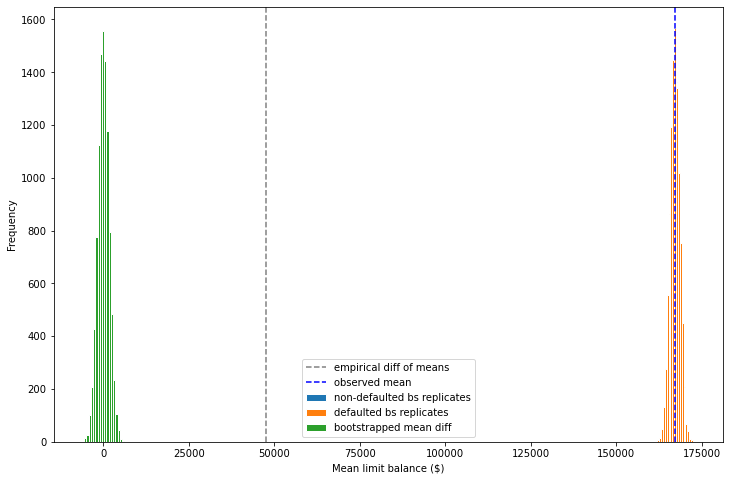

In [56]:
_ = plt.figure(figsize=(12,8))
_ = plt.hist(bs_replicates_non_defaulted ,edgecolor='white',bins=20,label='non-defaulted bs replicates')
_ = plt.hist(bs_replicates_defaulted ,edgecolor='white',bins=20,label='defaulted bs replicates')
_ = plt.hist(bs_replicates,edgecolor='white',bins=20,label='bootstrapped mean diff')
#_ = plt.axvline(bs_insured_std_ci[0],color='grey',linestyle='dashed',label="5% CI")
#_ = plt.axvline(np.mean(diffs),color='yellow',linestyle='dashed',label="Mean")
#_ = plt.axvline(bs_insured_std_ci[1],color='purple',linestyle='dashed',label="95% CI")
_ = plt.axvline(observed_diff_means,color='grey',linestyle='dashed',label="empirical diff of means")
_ = plt.axvline(np.mean(data.limit_bal),color='blue',linestyle='dashed',label="observed mean")

_ = plt.xlabel("Mean limit balance ($)")
_ = plt.ylabel("Frequency")
_ = plt.legend(loc='best')
plt.show()

We can perform the same bootstrap samples tests for the `pay_0` and `pay_6` variables:

In [57]:
#pay_0
#default group
default_bs_pay_0 = bs_reps(defaulted.pay_0,np.mean,N_rep)
print("Lower limit:", np.percentile(default_bs_pay_0, [5]))
print("Samples Mean:", np.mean(default_bs_pay_0))
print("Upper limit:", np.percentile(default_bs_pay_0, [95]))
print("Samples STD:", np.std(default_bs_pay_0))
print("\nActual Sample Mean:",np.mean(defaulted.pay_0))

Lower limit: [0.64089584]
Samples Mean: 0.668873063353275
Upper limit: [0.69688603]
Samples STD: 0.017065007294079372

Actual Sample Mean: 0.6686608375517717


In [58]:
#pay_0
#non_default group
non_default_bs_pay_0 = bs_reps(non_defaulted.pay_0,np.mean,N_rep)
print("Lower limit:", np.percentile(non_default_bs_pay_0, [5]))
print("Samples Mean:", np.mean(non_default_bs_pay_0))
print("Upper limit:", np.percentile(non_default_bs_pay_0, [95]))
print("Samples STD:", np.std(non_default_bs_pay_0))
print("\nActual Sample Mean:",np.mean(non_defaulted.pay_0))

Lower limit: [-0.22280078]
Samples Mean: -0.21237207061900612
Upper limit: [-0.20200523]
Samples STD: 0.006337428392504416

Actual Sample Mean: -0.21233653007846556


In [84]:
#pay_0

observed_mean = np.mean(np.concatenate([defaulted.pay_0,non_defaulted.pay_0]))

defaulted_mean_shifted = defaulted.pay_0 - np.mean(defaulted.pay_0) + observed_mean
non_defaulted_mean_shifted = non_defaulted.pay_0 - np.mean(non_defaulted.pay_0) + observed_mean
bs_replicates_defaulted = bs_reps(defaulted_mean_shifted, np.mean, 10000)
bs_replicates_non_defaulted = bs_reps(non_defaulted_mean_shifted, np.mean, 10000)
bs_replicates = bs_replicates_defaulted - bs_replicates_non_defaulted
observed_diff_means = np.mean(defaulted.pay_0) - np.mean(non_defaulted.pay_0)
p = np.sum(bs_replicates >= observed_diff_means) / len(bs_replicates)

print('p-value =', p)

p-value = 0.0


In [85]:
#pay_6

observed_mean = np.mean(np.concatenate([defaulted.pay_6,non_defaulted.pay_6]))

defaulted_mean_shifted = defaulted.pay_6 - np.mean(defaulted.pay_6) + observed_mean
non_defaulted_mean_shifted = non_defaulted.pay_6- np.mean(non_defaulted.pay_6) + observed_mean

bs_replicates_defaulted = bs_reps(defaulted_mean_shifted, np.mean, 10000)
bs_replicates_non_defaulted = bs_reps(non_defaulted_mean_shifted, np.mean, 10000)
bs_replicates = bs_replicates_defaulted - bs_replicates_non_defaulted
observed_diff_means = np.mean(defaulted.pay_6) - np.mean(non_defaulted.pay_6)
p = np.sum(bs_replicates >= observed_diff_means) / len(bs_replicates)

print('p-value =', p)

p-value = 0.0
